#### Using pygalfitm with S-PLUS

##### You should check out the example.ipynb first to understand the basics of pygalfitm.

This package was developed having s-plus in mind, so we created a simple function to fill the base parameters to the PyGalfitm class and sersic component params also.

First import Pygalfitm and connect to your splusdata account. (same as splus.cloud)

Also import from pygalfitm.VOs import splus module

In [3]:
from pygalfitm.VOs import splus

from pygalfitm import PyGalfitm
import splusdata

conn = splusdata.connect()

splus.cloud username:  larissa
splus.cloud password:  ········


You have access to internal data


#### Set the data folder where all input and psf images will be stored and output folder where feedmes and results will be stored

In [4]:
import os

DATA_FOLDER = "dev/data"
OUTPUT_FOLDER = "dev/outputs"

if not os.path.exists(DATA_FOLDER):
    os.makedirs(DATA_FOLDER)
if not os.path.exists(OUTPUT_FOLDER):
    os.makedirs(OUTPUT_FOLDER)

#### Here we call **splus.get_splus_class** that is going to return a PyGalfitm object 

In [5]:
name ="DR3.STRIPE82-0010.040212"
pygalgitm_object = splus.get_splus_class(
    name = name, 
    ra = 5.141037058766503, 
    dec = 0.8565412375744087, 
    cut_size = 100, 
    data_folder = DATA_FOLDER, 
    output_folder = OUTPUT_FOLDER, 
    remove_negatives = True,
    conn = conn, 
    bands=[ "u", "J0378", "J0395", "J0410", "J0430", "g", "J0515", "r", "J0660", "i", "J0861", "z"]
)


finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished


##### Check the active components

In [6]:
pygalgitm_object.active_components

['sersic']

##### Check the base 

In [7]:
pygalgitm_object.print_base()

A) dev/data/DR3.STRIPE82-0010.040212_u.fits,dev/data/DR3.STRIPE82-0010.040212_j0378.fits,dev/data/DR3.STRIPE82-0010.040212_j0395.fits,dev/data/DR3.STRIPE82-0010.040212_j0410.fits,dev/data/DR3.STRIPE82-0010.040212_j0430.fits,dev/data/DR3.STRIPE82-0010.040212_g.fits,dev/data/DR3.STRIPE82-0010.040212_j0515.fits,dev/data/DR3.STRIPE82-0010.040212_r.fits,dev/data/DR3.STRIPE82-0010.040212_j0660.fits,dev/data/DR3.STRIPE82-0010.040212_i.fits,dev/data/DR3.STRIPE82-0010.040212_j0861.fits,dev/data/DR3.STRIPE82-0010.040212_z.fits # Input data image (FITS file)
A1) u,j0378,j0395,j0410,j0430,g,j0515,r,j0660,i,j0861,z # Nick names (band labels) 
A2) 3533.29,3773.13,3940.7,4095.27,4292.39,4758.49,5133.15,6251.83,6613.88,7670.59,8607.59,8936.64 # Effective wavelenghts
B) dev/outputs/DR3.STRIPE82-0010.040212ss.fits # Output data image block
C) none                             # Sigma image name (made from data if blank or 'none')
D) dev/data/psf_DR3.STRIPE82-0010.040212_u.fits,dev/data/psf_DR3.STRIPE82-0

##### Check the component

In [8]:
pygalgitm_object.set_component("sersic", "3", "12", column=2)
pygalgitm_object.set_component("sersic", "9", "2", column=2)
pygalgitm_object.set_component("sersic", "10", "2", column=2)

In [9]:
pygalgitm_object.print_component("sersic")

1) 50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0 1     band       # Position x [pixel]
2) 50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0 1     band       # Position y [pixel]
3) 20.03239,19.632198,19.082266,18.835602,18.469963,17.744036,17.518347,17.059818,16.981134,16.703255,16.59315,16.504078 12    band       # Integrated magnitude
4) 4.8167644,4.9241953,4.711864,5.962118,7.3045397,8.896385,8.537632,8.565052,8.601865,8.923697,8.4707,8.658977 2     band       # R_e (effective radius) [pix]
5) 4,4,4,4,4,4,4,4,4,4,4,4             2     band       # Sersic index n (de Vaucouleurs n=4)
9) 0.54915315,0.72664624,0.6257667,0.74733156,0.86754566,0.5258544,0.660423,0.48355833,0.5033763,0.5305292,0.49647218,0.51206034 2     band       # Axis ratio (b/a)
10) 45.358234,81.61822,-60.01448,-40.802605,-82.90124,-58.097343,-40.55234,-63.48467,-63.60101,-59.80365,-58.383762,-60.65913 2     band       # Position angle (PA) [deg: Up=0, Left=90]
Z) 0                            

#### Write the feedme and run

In [10]:
pygalgitm_object.write_feedme()
_ = pygalgitm_object.run()

#### Read output and plots

In [11]:
from pygalfitm.read import read_output_to_class

In [12]:
## This It reads the .band output and returns a PyGalfitm instance 
## with all parameters from the output.band loaded into the base and components.

out_pygal = read_output_to_class(os.path.join(OUTPUT_FOLDER, name + "ss.galfit.01.band"))

In [13]:
out_pygal.print_base()

A) dev/data/DR3.STRIPE82-0010.040212_u.fits,dev/data/DR3.STRIPE82-0010.040212_j0378.fits,dev/data/DR3.STRIPE82-0010.040212_j0395.fits,dev/data/DR3.STRIPE82-0010.040212_j0410.fits,dev/data/DR3.STRIPE82-0010.040212_j0430.fits,dev/data/DR3.STRIPE82-0010.040212_g.fits,dev/data/DR3.STRIPE82-0010.040212_j0515.fits,dev/data/DR3.STRIPE82-0010.040212_r.fits,dev/data/DR3.STRIPE82-0010.040212_j0660.fits,dev/data/DR3.STRIPE82-0010.040212_i.fits,dev/data/DR3.STRIPE82-0010.040212_j0861.fits,dev/data/DR3.STRIPE82-0010.040212_z.fits       # Input data image (FITS file)
A1) u,j0378,j0395,j0410,j0430,g,j0515,r,j0660,i,j0861,z      # Band labels
A2) 3533.29,3773.13,3940.70,4095.27,4292.39,4758.49,5133.15,6251.83,6613.88,7670.59,8607.59,8936.64      # Band wavelengths
B) dev/outputs/DR3.STRIPE82-0010.040212ss.fits       # Output data image block
C) none,none,none,none,none,none,none,none,none,none,none,none 0.000    # Sigma image and min. sigma factor (made from data if blank or "none")
D) dev/data/psf_DR

In [14]:
out_pygal.print_component("sersic")

1) 51.995,51.995,51.995,51.995,51.995,51.995,51.995,51.995,51.995,51.995,51.995,51.995 1,0,0,0,0,0,0,0,0,0,0,0 band       #      Position x
2) 51.298,51.298,51.298,51.298,51.298,51.298,51.298,51.298,51.298,51.298,51.298,51.298 1,0,0,0,0,0,0,0,0,0,0,0 band       #      Position y
3) 10.866,10.750,10.432,10.608,11.104,12.129,11.567,12.294,12.355,12.498,12.577,12.665 1,1,1,1,1,1,1,1,1,1,1,1 band       #  Integrated magnitude
4) 1598.619,1713.149,1793.169,1866.981,1961.111,2183.688,2362.599,2896.802,3069.692,3574.303,4021.748,4178.879 1,1,0,0,0,0,0,0,0,0,0,0 band       #  R_e (effective radius)   [pix]
5) 2.327,2.781,3.098,3.391,3.764,4.645,5.354,7.471,8.155,10.155,11.927,12.550 1,1,0,0,0,0,0,0,0,0,0,0 band       #  Sersic index n (de Vaucouleurs n=4)
6) 0,0,0,0,0,0,0,0,0,0,0,0             0,0,0,0,0,0,0,0,0,0,0,0 band       #     -----
7) 0,0,0,0,0,0,0,0,0,0,0,0             0,0,0,0,0,0,0,0,0,0,0,0 band       #     -----
8) 0,0,0,0,0,0,0,0,0,0,0,0             0,0,0,0,0,0,0,0,0,0,0,0 band   

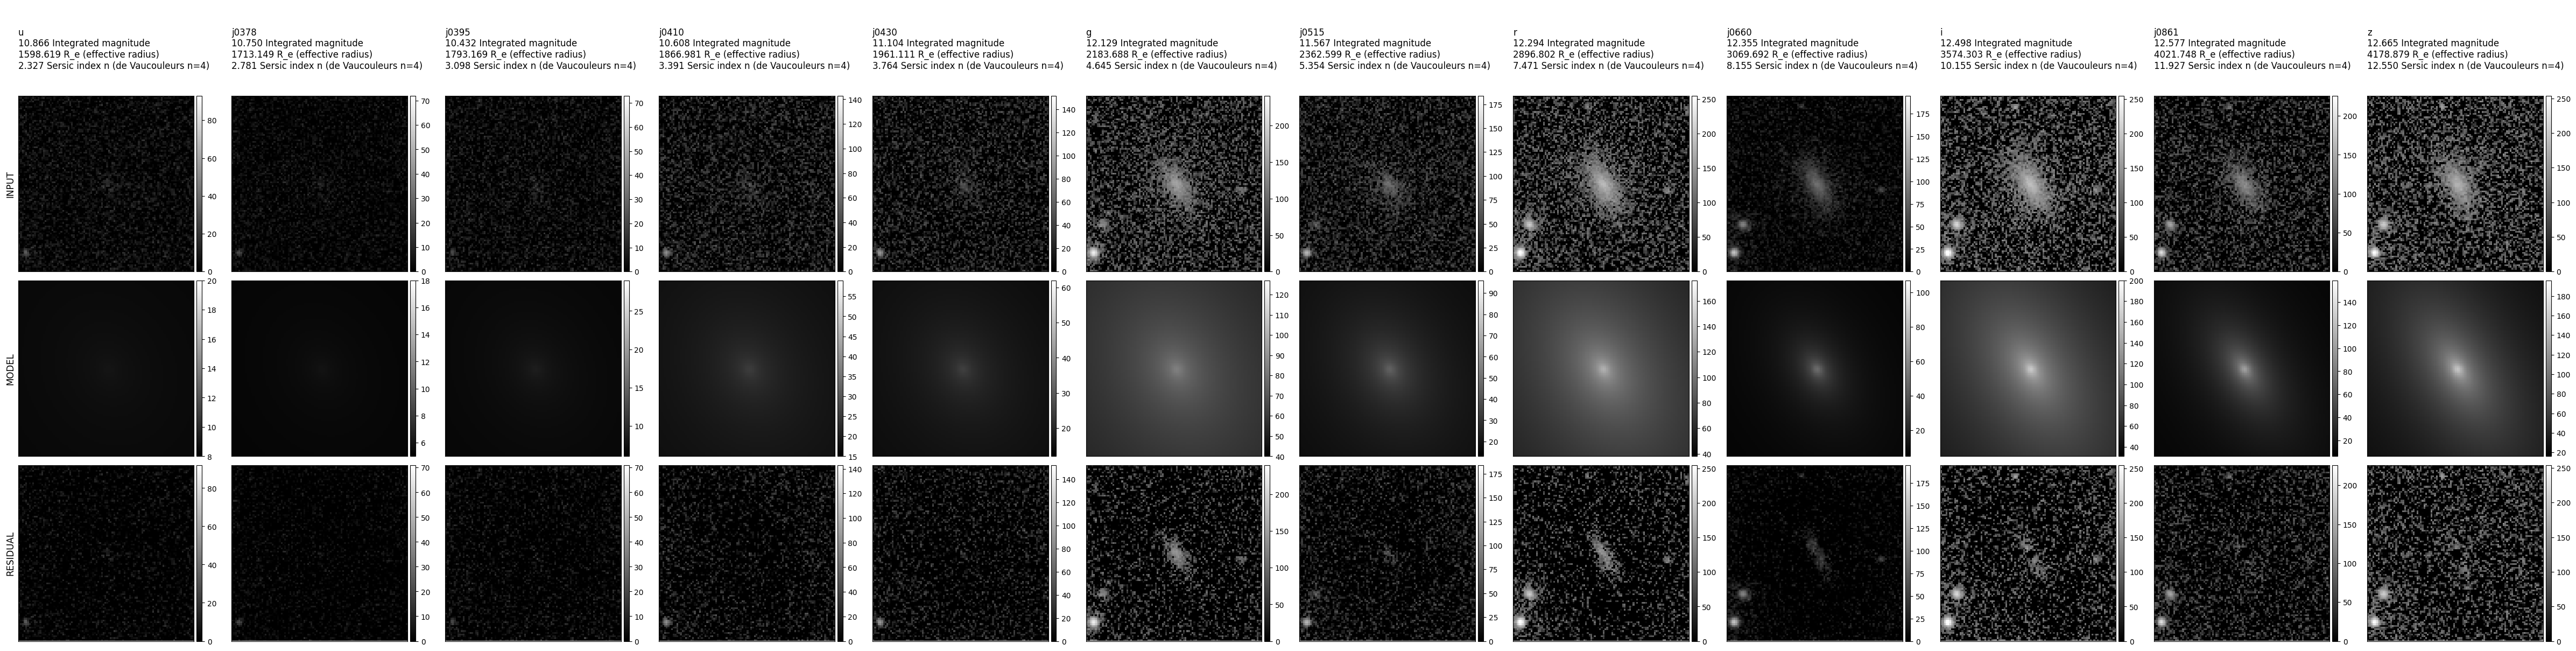

In [15]:
out_pygal.gen_plot(
    "sersic", 
    return_plot = False, 
    plot_parameters=[3, 4, 5], 
    colorbar=True
)

In [66]:
out_pygal.create_fits_table(os.path.join(OUTPUT_FOLDER, name + "ss.fits"))

Cube not compatible, different number of hdus and bands to save.


In [67]:
from astropy.io import fits
from astropy.table import Table

cube = fits.open(os.path.join(OUTPUT_FOLDER, name + "ss.fits"))

In [24]:
cube

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x16b1aabe0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x16b1aa400>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x16b143670>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x16b1a2d60>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x16b1a2b50>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x16b1a2be0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x16b1a2c40>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x16b139610>]

In [30]:
print(cube[1].name)
Table(cube[1].data)

J0378


ID,sersic_Position_x,sersic_Position_y,sersic_Integrated_magnitude,sersic_R_e,sersic_Sersic_index_n,sersic_Axis_ratio,sersic_Position_angle,ZP
str4,float64,float64,float64,float64,float64,float64,float64,float64
test,103.405,100.928,15.619,94.527,4.321,1.665,-192.037,20.048
test,103.405,100.928,15.619,94.527,4.321,1.665,-192.037,20.048
